In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations

In [14]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 14.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 3.9 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the dataset
file_path = 'prog_book.csv'  # Adjust the path as necessary
data = pd.read_csv(file_path)

In [5]:
# Preprocess the data
data['Reviews'] = data['Reviews'].str.replace(',', '').astype(int)  # Convert Reviews to int

In [6]:
# Calculate IQR for each specified column
columns_to_check = ['Rating', 'Reviews', 'Number_Of_Pages', 'Price']
iqr_values = {}

In [7]:
for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    iqr_values[column] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}

In [8]:
# Print IQR values
print(iqr_values)

{'Rating': {'Q1': 3.915, 'Q3': 4.25, 'IQR': 0.33499999999999996}, 'Reviews': {'Q1': 5.5, 'Q3': 116.5, 'IQR': 111.0}, 'Number_Of_Pages': {'Q1': 289.0, 'Q3': 572.5, 'IQR': 283.5}, 'Price': {'Q1': 30.75147059, 'Q3': 67.85441176500001, 'IQR': 37.10294117500001}}


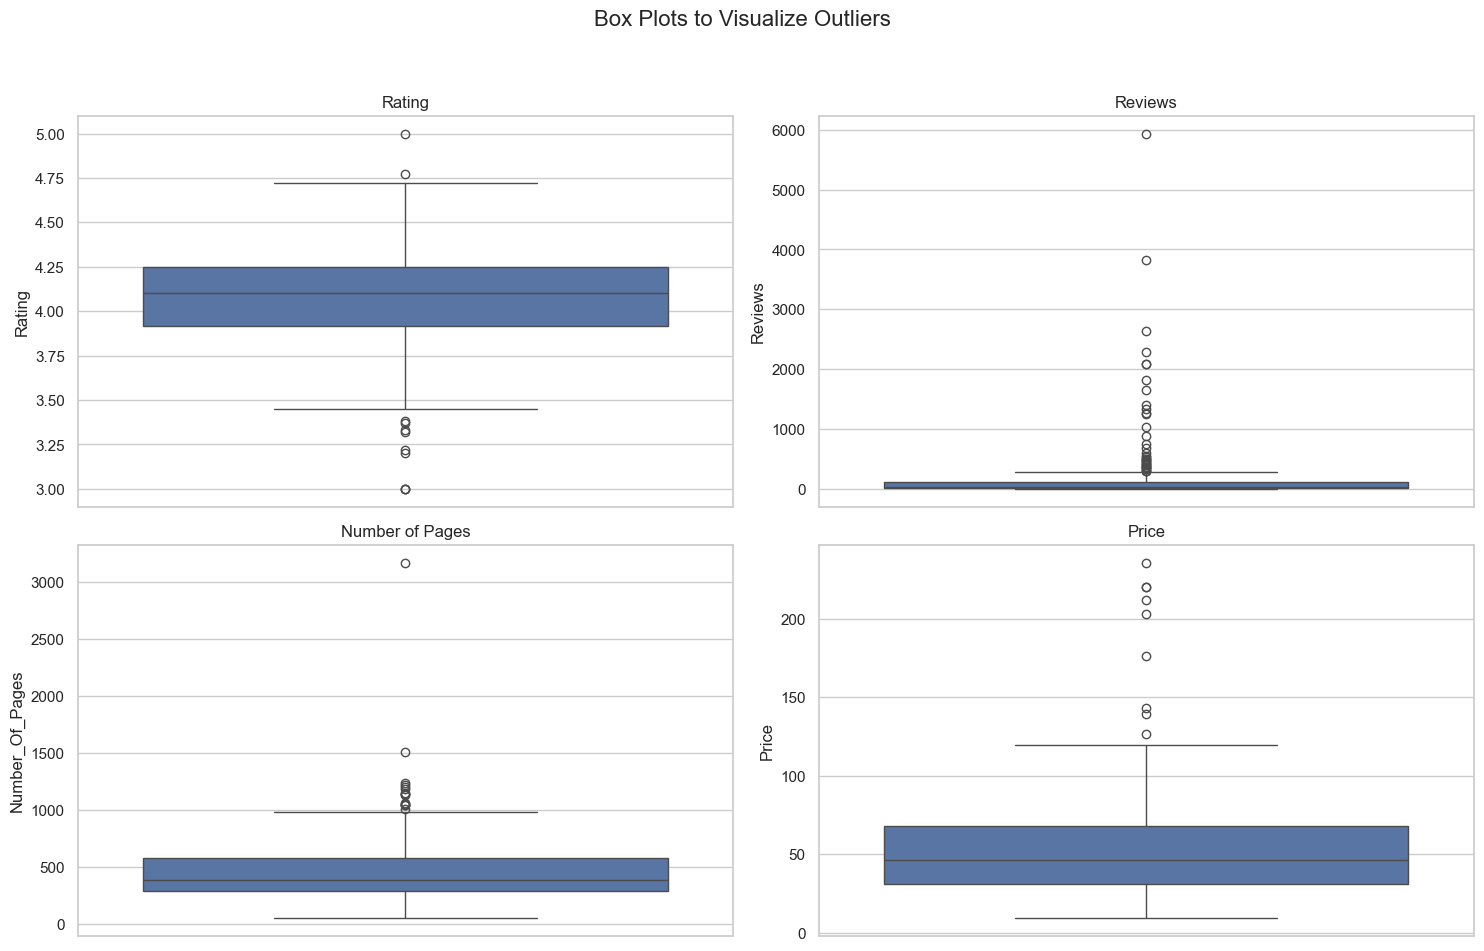

In [9]:
# Plotting box plots for each specified column
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Box Plots to Visualize Outliers', fontsize=16)

sns.boxplot(data=data, y='Rating', ax=axes[0, 0]).set_title('Rating')
sns.boxplot(data=data, y='Reviews', ax=axes[0, 1]).set_title('Reviews')
sns.boxplot(data=data, y='Number_Of_Pages', ax=axes[1, 0]).set_title('Number of Pages')
sns.boxplot(data=data, y='Price', ax=axes[1, 1]).set_title('Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

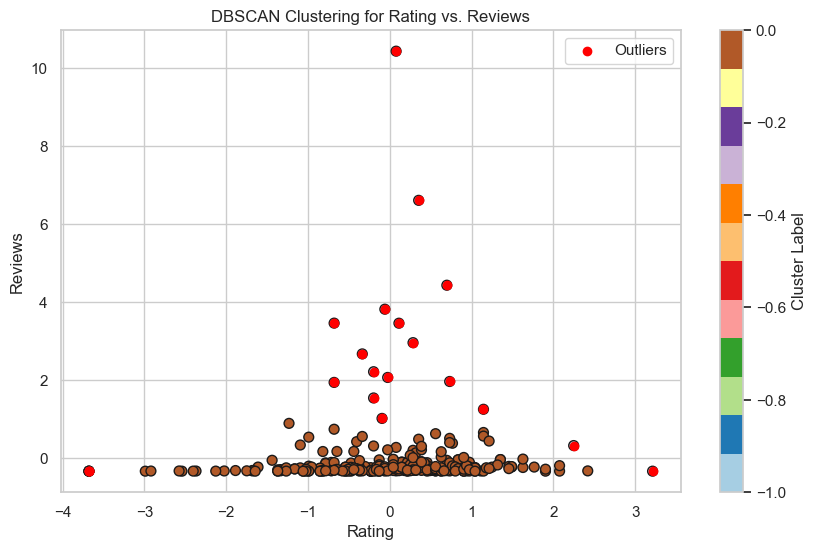

Outliers for Rating vs. Reviews:
     Rating  Reviews
0      4.17     3829
1      4.01     1406
3      3.97     1658
4      4.06     1325
6      4.09     5938
7      4.15     1817
8      3.87     2093
13     3.87     1255
19     4.10     2092
23     4.28     1268
45     4.27     2629
52     4.01     1035
54     5.00        0
90     4.05     2290
122    4.04      746
131    4.72      362
138    4.40      875
177    3.00        0
182    3.00        0
187    3.00        0




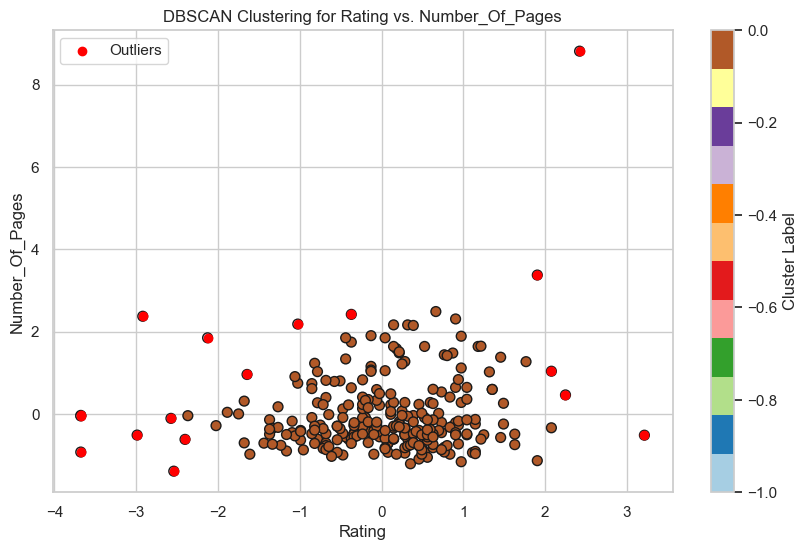

Outliers for Rating vs. Number_Of_Pages:
     Rating  Number_Of_Pages
2      3.33               50
24     3.20              318
54     5.00              317
60     3.32              442
86     3.22             1200
131    4.72              616
132    3.37              286
137    4.62             1506
177    3.00              464
182    3.00              460
187    3.00              192
194    4.67              792
203    3.96             1214
226    3.59              768
232    3.77             1142
260    3.45             1040
269    4.77             3168




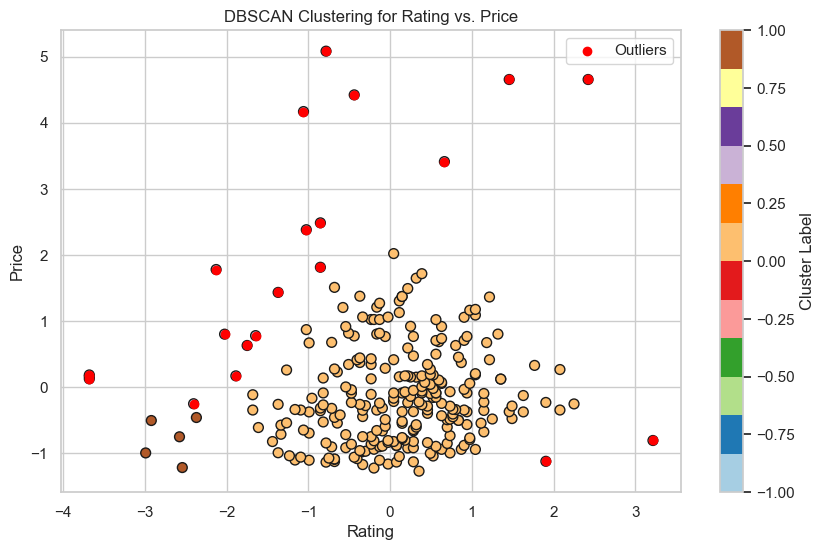

Outliers for Rating vs. Price:
     Rating       Price
9      4.62   14.641176
54     5.00   25.855882
132    3.37   45.664706
177    3.00   59.082353
182    3.00   60.391176
184    3.52   60.682353
187    3.00   61.167647
213    3.56   77.052941
226    3.59   82.367647
227    3.48   83.150000
255    3.67  105.650000
260    3.45  117.988235
261    3.82  119.202941
263    3.77  139.435294
264    3.82  143.138235
265    4.26  176.144118
266    3.76  203.108823
267    3.94  212.097059
268    4.49  220.385294
269    4.77  220.385294
270    3.84  235.650000




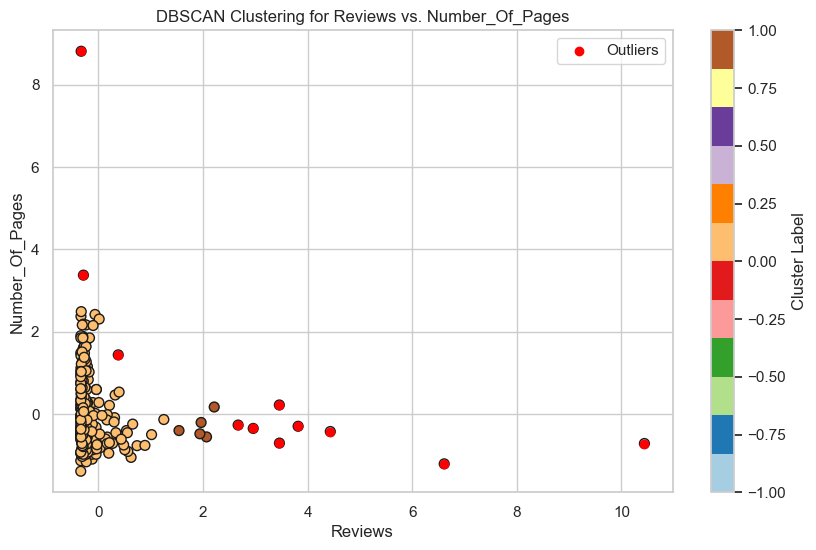

Outliers for Reviews vs. Number_Of_Pages:
     Reviews  Number_Of_Pages
0       3829              105
3       1658              393
6       5938              256
7       1817              368
8       2093              259
19      2092              542
45      2629              345
90      2290              384
119      395              914
137       28             1506
269        4             3168




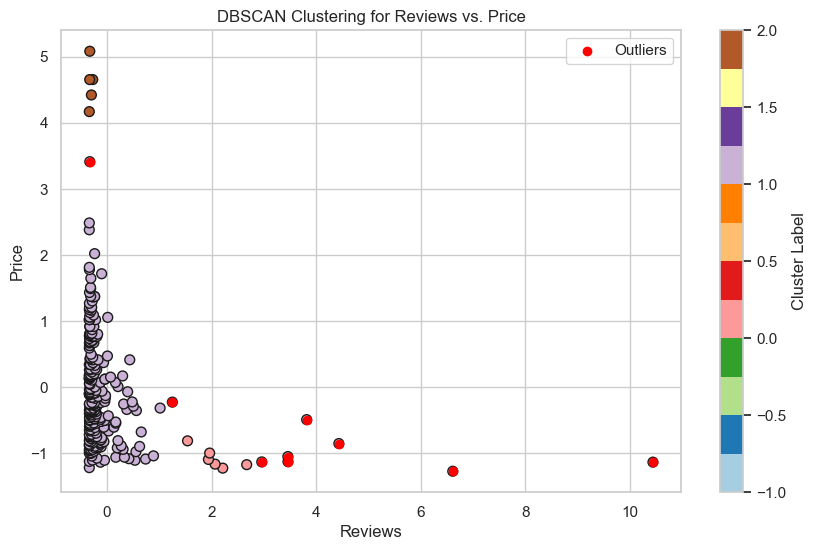

Outliers for Reviews vs. Price:
     Reviews       Price
0       3829    9.323529
6       5938   14.232353
7       1817   14.364706
8       2093   14.502941
19      2092   17.229412
45      2629   24.258824
90      2290   37.141176
138      875   46.573529
265        5  176.144118




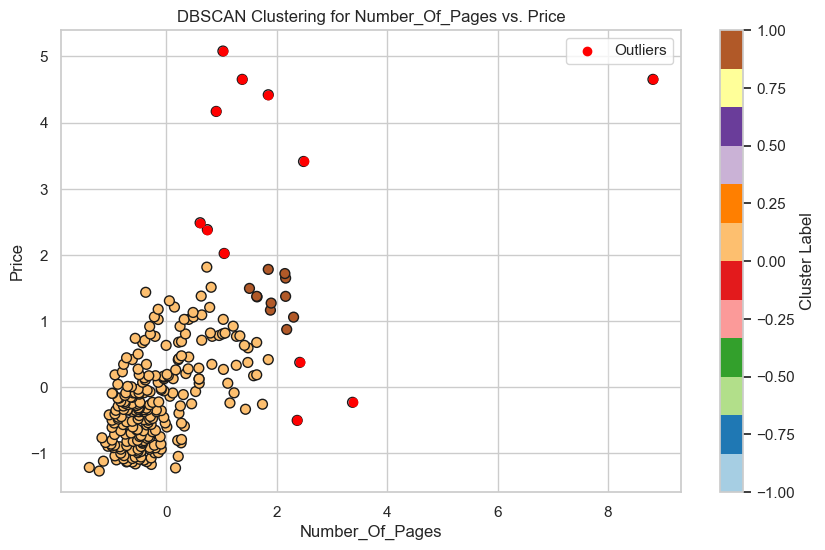

Outliers for Number_Of_Pages vs. Price:
     Number_Of_Pages       Price
86              1200   36.617647
137             1506   46.358824
203             1214   67.873529
262              796  126.579412
263              703  139.435294
264              663  143.138235
265             1235  176.144118
266              752  203.108823
267             1040  212.097059
268              896  220.385294
269             3168  220.385294
270              789  235.650000




In [19]:
# Multivariate outlier detection

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns_to_check])
data_scaled = pd.DataFrame(data_scaled, columns=columns_to_check)

# Getting all possible pairs of the features
feature_pairs = list(itertools.combinations(columns_to_check, 2))

# Performing DBSCAN for each pair and plotting
for pair in feature_pairs:
    # Applying DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(data_scaled[list(pair)])
    
    # Identifying outliers
    outlier_indices = np.where(clusters == -1)[0]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(data_scaled[pair[0]], data_scaled[pair[1]], c=clusters, cmap='Paired', marker='o', edgecolor='k', s=50)
    plt.title(f'DBSCAN Clustering for {pair[0]} vs. {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.colorbar(label='Cluster Label')
    plt.scatter(data_scaled.iloc[outlier_indices][pair[0]], data_scaled.iloc[outlier_indices][pair[1]], color='red', label='Outliers')
    plt.legend()
    plt.show()
    
    # Printing outliers
    if len(outlier_indices) > 0:
        print(f"Outliers for {pair[0]} vs. {pair[1]}:")
        print(data.iloc[outlier_indices][list(pair)])
        print("\n")
    else:
        print(f"No outliers detected for {pair[0]} vs. {pair[1]}.\n")


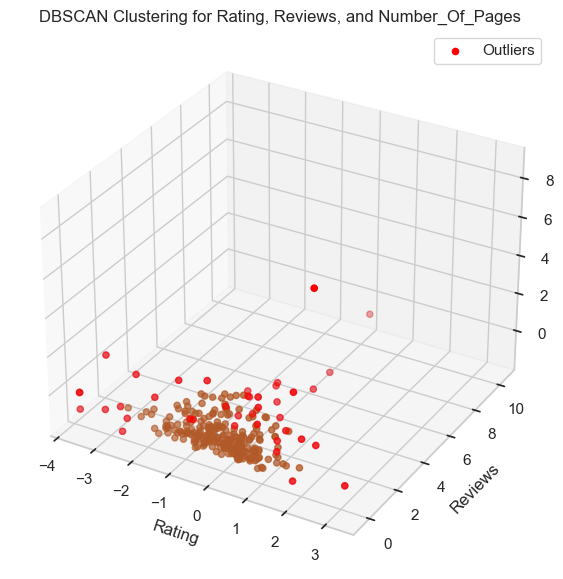

Outliers for ('Rating', 'Reviews', 'Number_Of_Pages'):
     Rating  Reviews  Number_Of_Pages
0      4.17     3829              105
1      4.01     1406              527
2      3.33        0               50
3      3.97     1658              393
4      4.06     1325              305
6      4.09     5938              256
7      4.15     1817              368
8      3.87     2093              259
9      4.62        0              128
11     3.78      481              352
13     3.87     1255              328
19     4.10     2092              542
21     3.71      676              242
23     4.28     1268              412
24     3.20        0              318
45     4.27     2629              345
52     4.01     1035              352
54     5.00        0              317
60     3.32        3              442
67     4.40      547              400
86     3.22        2             1200
90     4.05     2290              384
119    4.29      395              914
122    4.04      746             

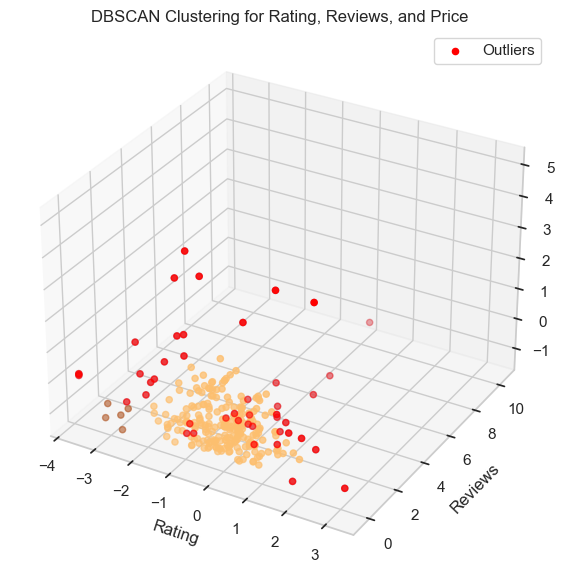

Outliers for ('Rating', 'Reviews', 'Price'):
     Rating  Reviews       Price
0      4.17     3829    9.323529
1      4.01     1406   11.000000
3      3.97     1658   12.873529
4      4.06     1325   13.164706
6      4.09     5938   14.232353
7      4.15     1817   14.364706
8      3.87     2093   14.502941
9      4.62        0   14.641176
11     3.78      481   15.229412
13     3.87     1255   15.682353
18     3.75      370   16.891176
19     4.10     2092   17.229412
21     3.71      676   17.620588
23     4.28     1268   19.132353
38     4.23      530   22.694118
45     4.27     2629   24.258824
52     4.01     1035   25.702941
54     5.00        0   25.855882
67     4.40      547   30.491176
90     4.05     2290   37.141176
122    4.04      746   43.370588
131    4.72      362   45.561765
132    3.37        1   45.664706
138    4.40      875   46.573529
177    3.00        0   59.082353
182    3.00        0   60.391176
184    3.52        9   60.682353
187    3.00        0   61.16764

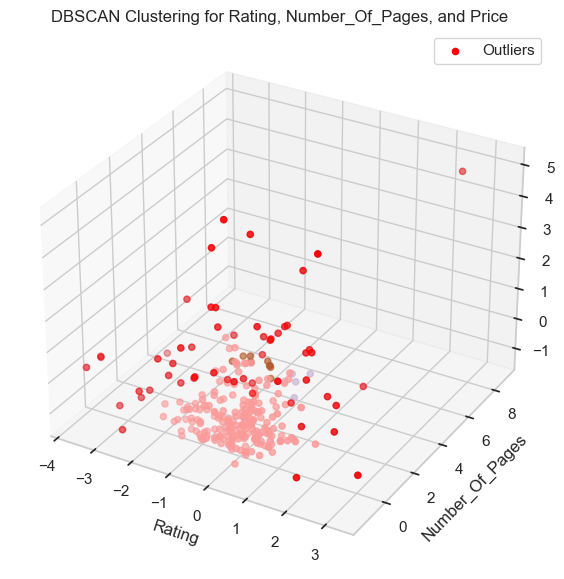

Outliers for ('Rating', 'Number_Of_Pages', 'Price'):
     Rating  Number_Of_Pages       Price
2      3.33               50   11.267647
9      4.62              128   14.641176
24     3.20              318   19.152941
54     5.00              317   25.855882
60     3.32              442   27.850000
86     3.22             1200   36.617647
94     3.38              462   38.235294
119    4.29              914   42.614706
125    4.50              554   44.426471
129    3.96             1008   45.326471
131    4.72              616   45.561765
132    3.37              286   45.664706
134    4.03              828   46.000000
137    4.62             1506   46.358824
147    3.58              570   50.511765
155    3.83              851   51.473529
177    3.00              464   59.082353
182    3.00              460   60.391176
184    3.52              487   60.682353
187    3.00              192   61.167647
193    3.70              528   63.835294
194    4.67              792   64.091176
198 

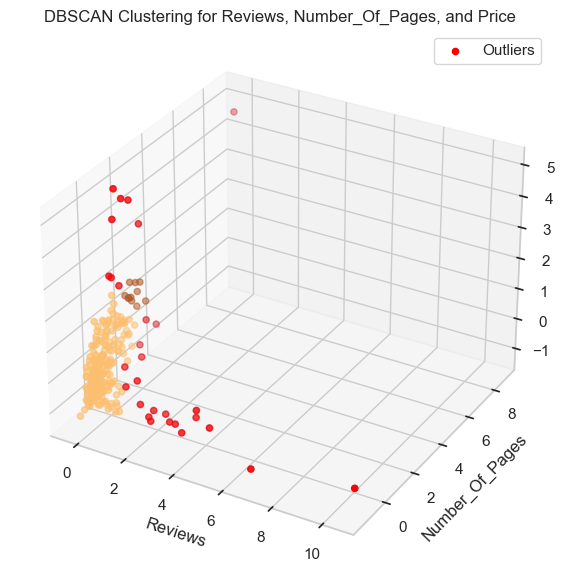

Outliers for ('Reviews', 'Number_Of_Pages', 'Price'):
     Reviews  Number_Of_Pages       Price
0       3829              105    9.323529
1       1406              527   11.000000
3       1658              393   12.873529
4       1325              305   13.164706
6       5938              256   14.232353
7       1817              368   14.364706
8       2093              259   14.502941
13      1255              328   15.682353
19      2092              542   17.229412
23      1268              412   19.132353
45      2629              345   24.258824
52      1035              352   25.702941
86         2             1200   36.617647
90      2290              384   37.141176
119      395              914   42.614706
122      746              322   43.370588
131      362              616   45.561765
137       28             1506   46.358824
138      875              434   46.573529
203      150             1214   67.873529
262       56              796  126.579412
263        0          

In [18]:

# Predefined steps: Loading and preprocessing data, scaling, etc.

# Define the feature combinations
feature_combinations = list(combinations(columns_to_check, 3))

for feature_set in feature_combinations:
    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(data_scaled[list(feature_set)])
    
    # Identifying outliers
    outlier_indices = np.where(clusters == -1)[0]
    
    # 3D Plotting
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_scaled[feature_set[0]], data_scaled[feature_set[1]], data_scaled[feature_set[2]], c=clusters, cmap='Paired', marker='o')
    ax.scatter(data_scaled.iloc[outlier_indices][feature_set[0]], data_scaled.iloc[outlier_indices][feature_set[1]], data_scaled.iloc[outlier_indices][feature_set[2]], color='red', label='Outliers')
    ax.set_title(f'DBSCAN Clustering for {feature_set[0]}, {feature_set[1]}, and {feature_set[2]}')
    ax.set_xlabel(feature_set[0])
    ax.set_ylabel(feature_set[1])
    ax.set_zlabel(feature_set[2])
    ax.legend()
    plt.show()
    
    # Printing outliers
    if len(outlier_indices) > 0:
        print(f"Outliers for {feature_set}:")
        print(data.iloc[outlier_indices][list(feature_set)])
        print("\n")
    else:
        print(f"No outliers detected for {feature_set}.\n")
